**Advanced Astroinformatics (Semester 1 2024)**

# Plotting TESS light curves

**Advanced Astroinformatics Student Project**

*N. Hernitschek*



---
## Contents
* [Loading light curves](#first-bullet)
* [Plotting light curves](#second-bullet)
* [Plotting light curves in bulk](#third-bullet)
* [Summary](#fourth-bullet)


## 1. Loading Light Curves <a class="anchor" id="second-bullet"></a>

The light curves are available at https://github.com/ninahernitschek/advanced_astroinformatics/releases/download/v1.0/_data.zip

Download it and extract it. It should expand to about 600 MB.

You will find the following subfolders:

`_TESS_lightcurves_raw`

`_TESS_lightcurves_median_after_detrended` 

`_TESS_lightcurves_outliercleaned`


and a file `info_tess_data.txt`.


Please open the file `info_tess_data.txt` and a light curve file from any of the folders to familiarize yourself with the data.

## 2. Plotting Light Curves <a class="anchor" id="second-bullet"></a>

The next step is to make plots of those light curves.

We begin with just one light curve.


First, load the light curve:

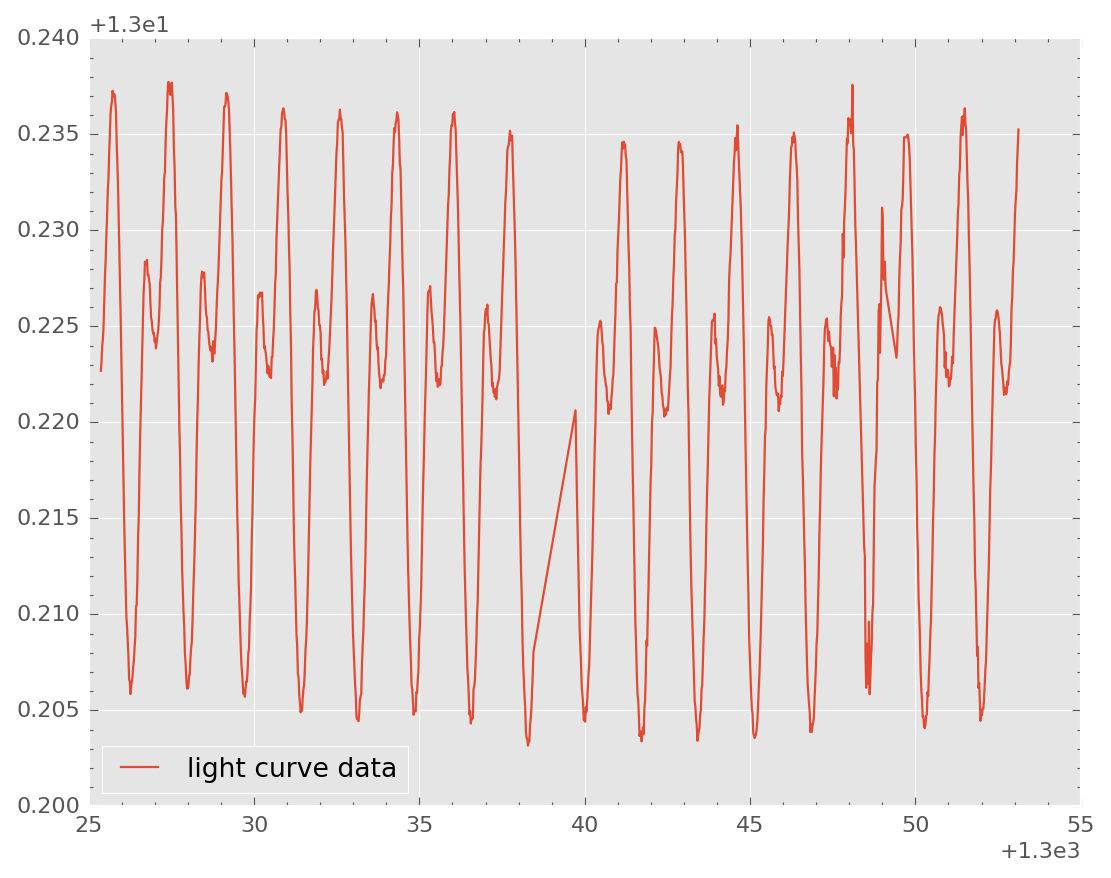

In [10]:


%matplotlib inline
%config InlineBackend.figure_format='retina' # very useful command for high-res images

# invoke pyplot in matplotlib, give it an alias
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import numpy as np
from concurrent.futures import as_completed

import math
import glob
import sys
import os

#import matplotlib
#matplotlib.use('PDF')
#import matplotlib.pyplot as plt 

import matplotlib.style
import matplotlib as mpl



import pandas as pd


data_in = pd.read_csv("_data/_TESS_lightcurves_outliercleaned/ACV/41259805_sector01_4_2_cleaned.lc",sep=',',
names = ['time', 'mag', 'magerr'])


tess_lc = data_in.to_records(index=False)

plt.plot(tess_lc['time'], tess_lc['mag'], label=r'light curve data')

#plt.grid(which='major')
plt.legend(loc='lower left');

## optional extras
plt.minorticks_on()
plt.tick_params(which='both', direction='in', tick2On=True)


other ways to read in data: `numpy.loadtxt`

We chose here `pandas` as it will enable us to do a few things more when reading in tables (you will see this later on).

In [11]:
print(data_in)

             time        mag    magerr
0     1325.365967  13.222690  0.004788
1     1325.386719  13.223169  0.004790
2     1325.407593  13.224006  0.004793
3     1325.428467  13.224393  0.004793
4     1325.449219  13.225105  0.004798
...           ...        ...       ...
1223  1353.032349  13.231553  0.004831
1224  1353.053101  13.232067  0.004829
1225  1353.073975  13.233518  0.004842
1226  1353.094849  13.234316  0.004840
1227  1353.115601  13.235259  0.004841

[1228 rows x 3 columns]


We now plot this light curve using `matplotlib`.

**Try to figure it out on your own first!**


## 3. Plotting Light Curves in Bulk <a class="anchor" id="third-bullet"></a>


The light curves are organized in folders corresponding to the
VARIABLE STAR TYPE DESIGNATIONS IN VSX:

https://www.aavso.org/vsx/index.php?view=about.vartypes


Modify the plotting code so it plots:
    a) all light curves in a given folder
    b) all light curves in all folders.
    
Hints:
- change line style to plot as points, not as lines
- save the light curves as `*.pdf` files
- give them meaningful file names
- add axis labels and title
- after plotting a few files successfully, you will encounter an error message. Why does this happen?

**A. All light curves in a given folder**

In [21]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
import os
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('ggplot')

# Function to plot and save to PDF
def plot_light_curves_to_pdf(directory):
    route = '_data\\_TESS_lightcurves_outliercleaned\\'
    path = route + directory
    print(path)
    pdf_filename = os.path.join(path, 'light_curves.pdf')
    f_oc = [path + '\\' + file for file in os.listdir(path)]
    # Create a PdfPages object
    with PdfPages(pdf_filename) as pdf:
        for i in range(0,len(f_oc)):
            data_in = pd.read_csv(f_oc[i], sep=',', names=['time', 'mag', 'magerr'],encoding='unicode_escape')
            tess_lc = data_in.to_records(index=False)
            plt.figure()
            plt.scatter(tess_lc['time'], tess_lc['mag'], alpha=0.5, linewidth=1.2, s=1.5)
            plt.minorticks_on()
            plt.tick_params(which='both', direction='in', tick2On=True)
            plt.xlabel('time')
            plt.ylabel('magnitude')
            plt.title(f'Light Curve of {os.path.basename(f_oc[i])}')
            
            # Save the current plot to the PDF
            pdf.savefig()
            plt.close()  # Close the plot to free up memory

    print(f'All plots saved to {pdf_filename}')

directory = input('Enter File name: ')
plot_light_curves_to_pdf(directory)


Enter File name:  ROT


_data\_TESS_lightcurves_outliercleaned\ROT
All plots saved to _data\_TESS_lightcurves_outliercleaned\ROT\light_curves.pdf


**B. All light curves in all folder**

Enter File name:  rr


_data\_TESS_lightcurves_outliercleaned\
_data\_TESS_lightcurves_outliercleaned\ACV\238869272_sector01_3_2_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\270304671_sector01_1_3_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\277688819_sector01_2_1_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\306893839_sector01_4_3_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\308452159_sector01_4_3_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\309148260_sector01_4_3_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\327597288_sector01_2_1_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\348898673_sector01_4_3_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\349409844_sector01_4_3_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\350146577_sector01_4_3_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\355650641_sector01_2_2_cleaned.lc
_data\_TESS_lightcurves_outliercleaned\ACV\358467700_sector01_4_3_cleaned.lc
_data\_TESS_lightcurves_outlierclean

KeyboardInterrupt: 

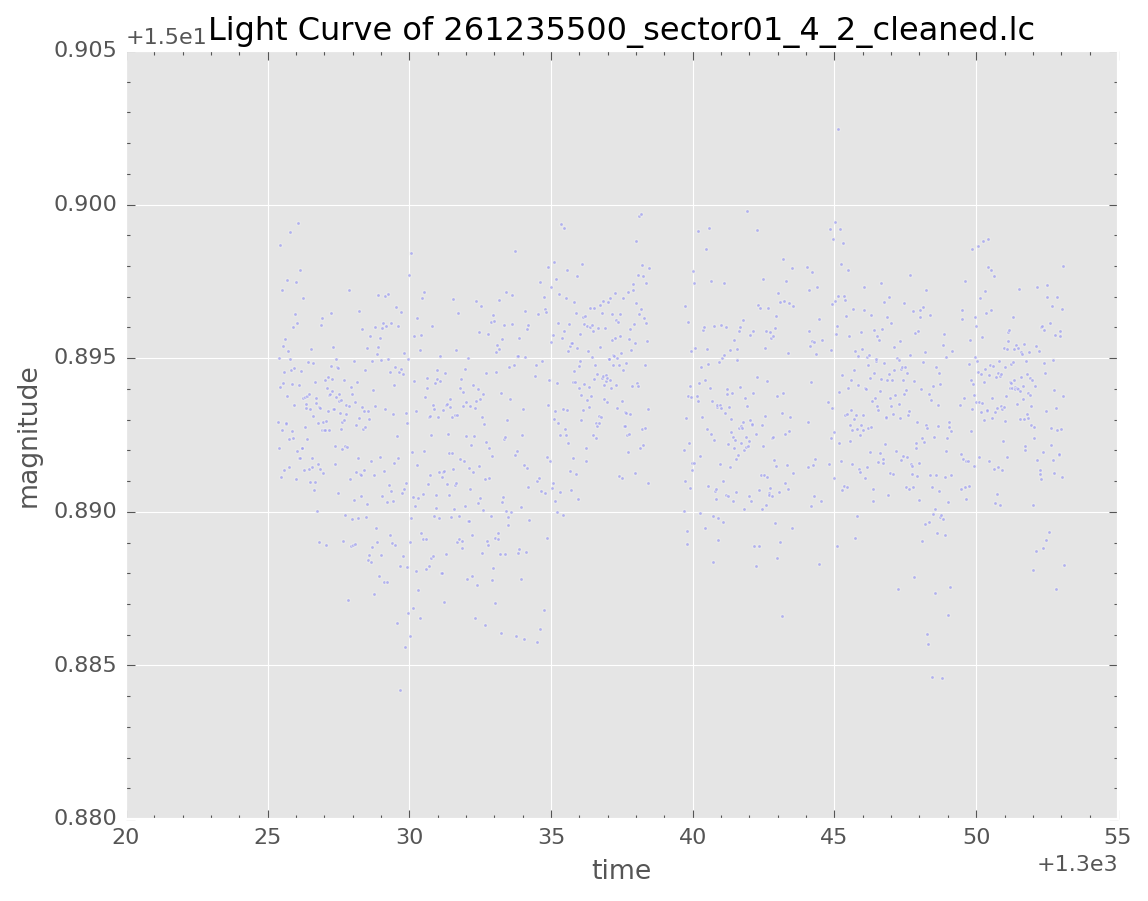

In [24]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # very useful command for high-res images

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
import os
from matplotlib.backends.backend_pdf import PdfPages

# Use ggplot style for the plots
plt.style.use('ggplot')

# Function to plot and save to PDF
def plot_light_curves_to_pdf(directory): 
    route = '_data\\_TESS_lightcurves_outliercleaned\\'
    path = route
    print(path)

    pdf_filename = os.path.join(path, 'light_curves.pdf')
    
    # Create a PdfPages object
    with PdfPages(pdf_filename) as pdf:
        # Iterate over files in the directory
        for filename in glob.iglob(f'{path}/*/*'):
            # Read the data
            print(filename)
            data_in = pd.read_csv(filename, sep=',', names=['time', 'mag', 'magerr'])
            tess_lc = data_in.to_records(index=False)
            
            # Create the plot
            plt.figure()
            plt.scatter(tess_lc['time'], tess_lc['mag'], alpha=0.5, linewidth=1.2, s=1.5)
            plt.minorticks_on()
            plt.tick_params(which='both', direction='in', tick2On=True)
            plt.xlabel('time')
            plt.ylabel('magnitude')
            plt.title(f'Light Curve of {os.path.basename(filename)}')
            
            # Save the current plot to the PDF
            pdf.savefig()
            plt.close()  # Close the plot to free up memory

    print(f'All plots saved to {pdf_filename}')

# Get the directory input from the user
directory = input('Enter File name: ')
plot_light_curves_to_pdf(directory)


**Your tasks until next week:**

Modify the plotting code to plot three panels for each light curve: raw, median after CBV, outlier cleaned.

If you have more time, look up variable star types on the VSX website.

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kaurs\AppData\Local\Temp\ipykernel_17524\428717236.py:19: SyntaxWarning: invalid escape sequence '\s'
  data_r = pd.read_csv(f_r[i], sep='\s+', names=['time', 'mag', 'magerr'])
C:\Users\kaurs\AppData\Local\Temp\ipykernel_17524\428717236.py:20: SyntaxWarning: invalid escape sequence '\s'
  data_dt = pd.read_csv(f_dt[i], sep='\s+', names=['time', 'mag', 'mag after cbv', 'magerr'])


Enter File name:  RR


_data\_TESS_lightcurves_outliercleaned\RR
_data\_TESS_lightcurves_raw\RR
_data\_TESS_lightcurves_median_after_detrended\_lc_median_after_cbv_detrended_RR


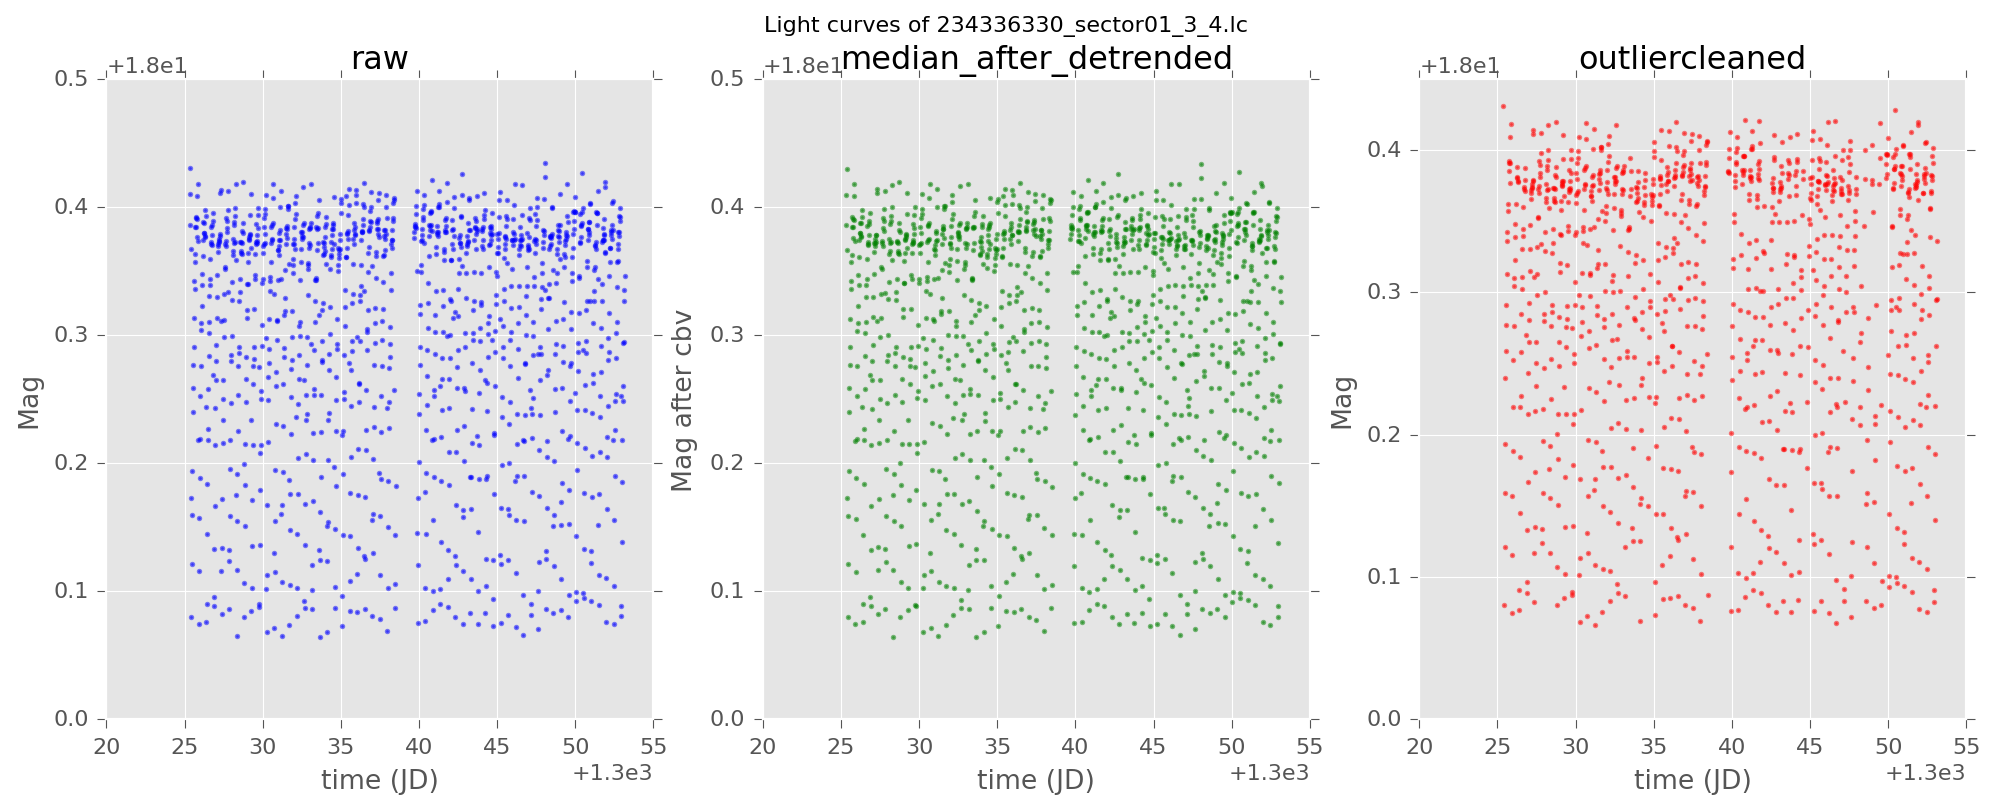

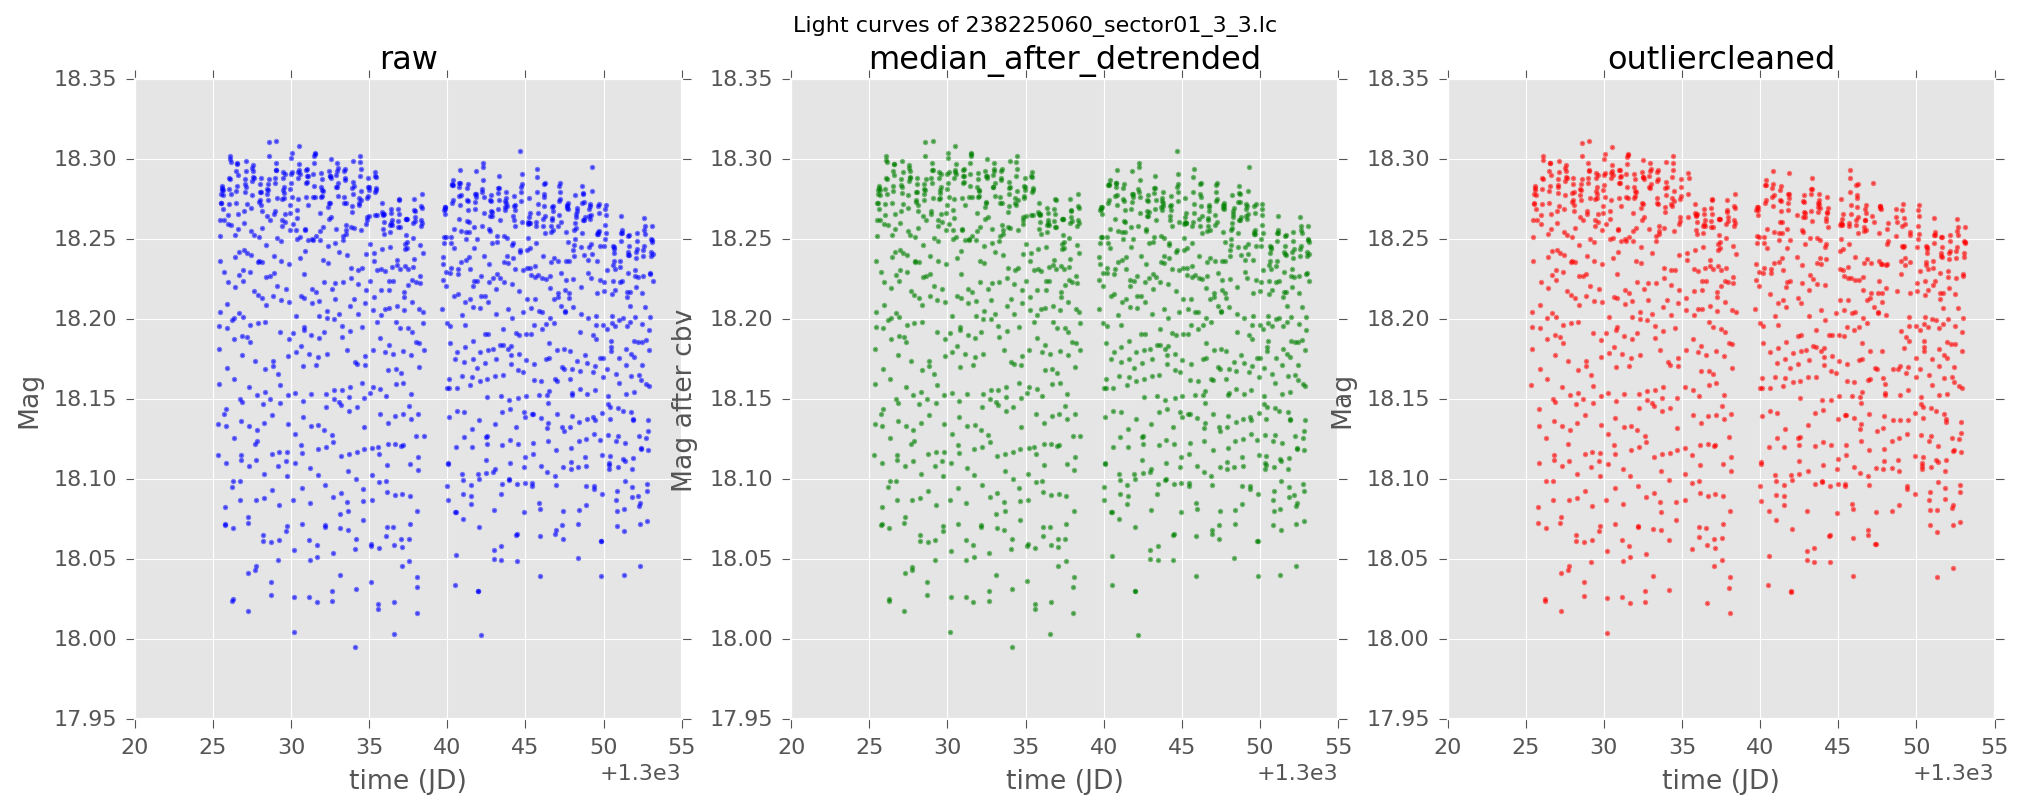

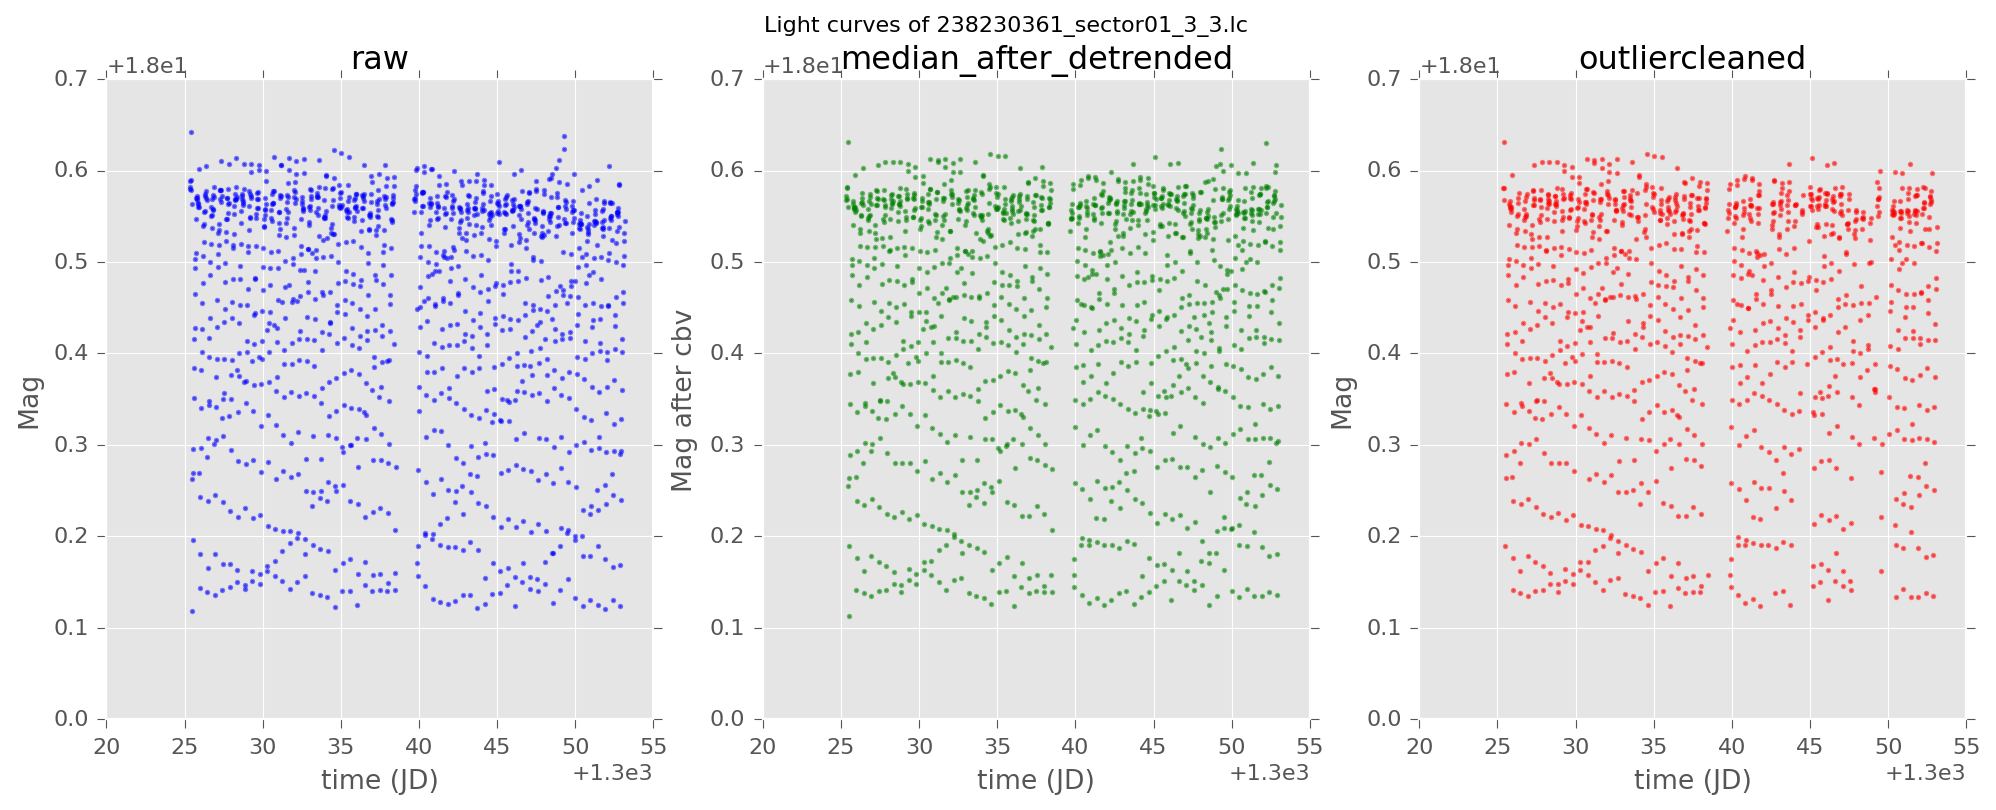

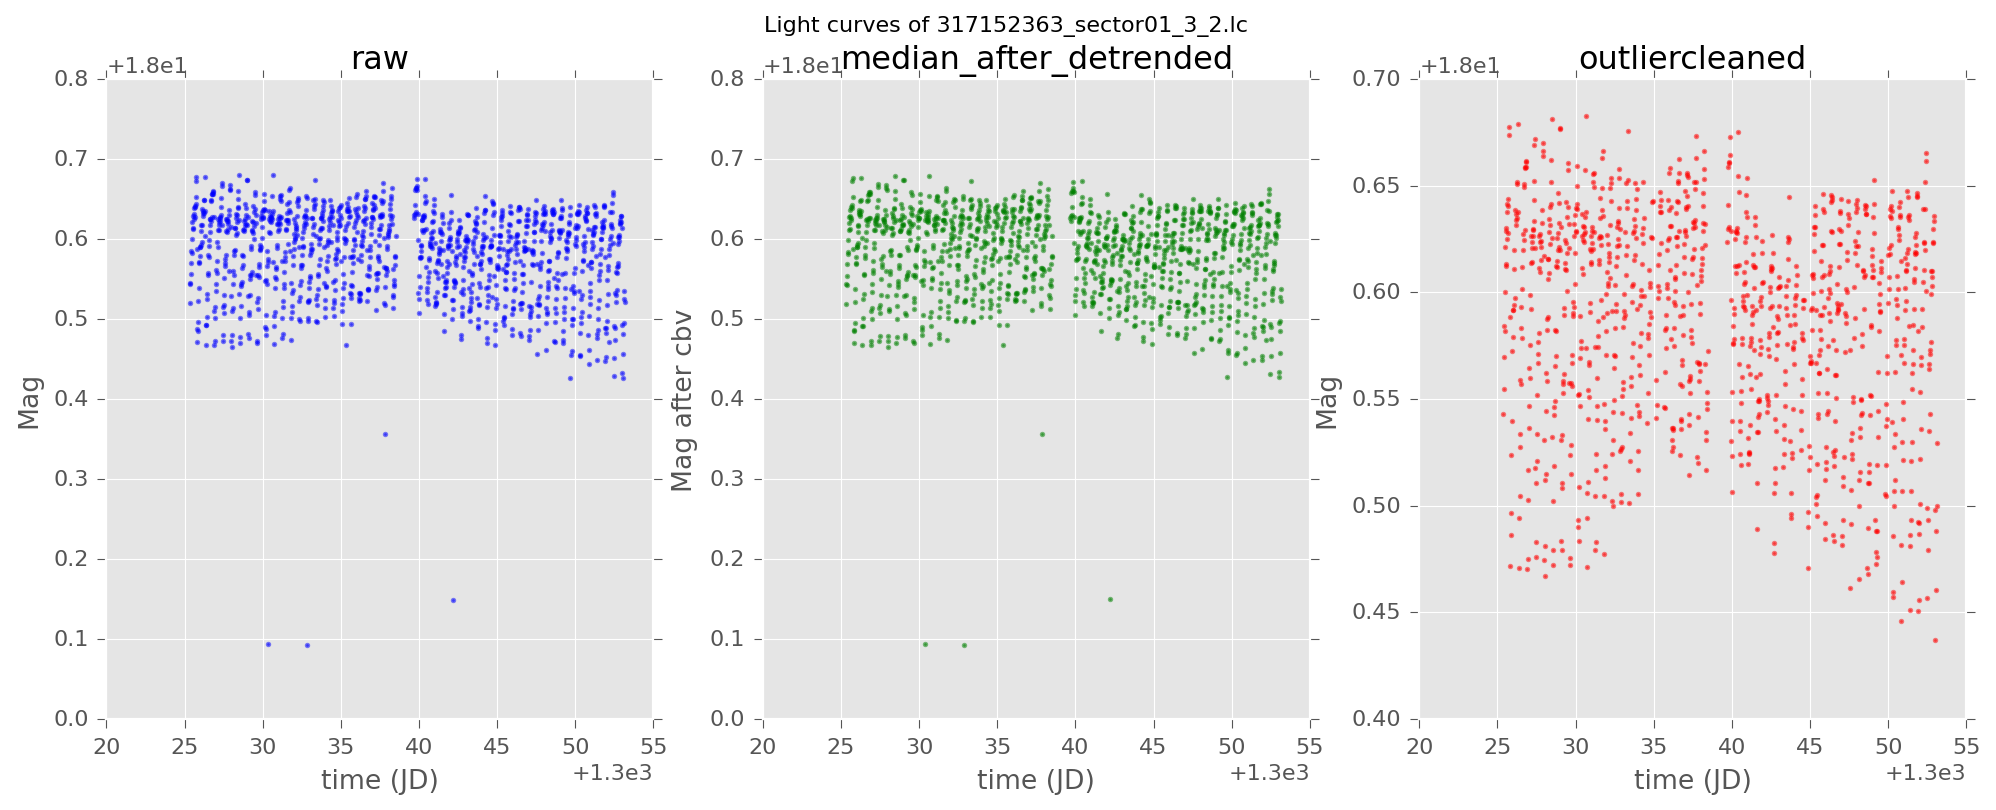

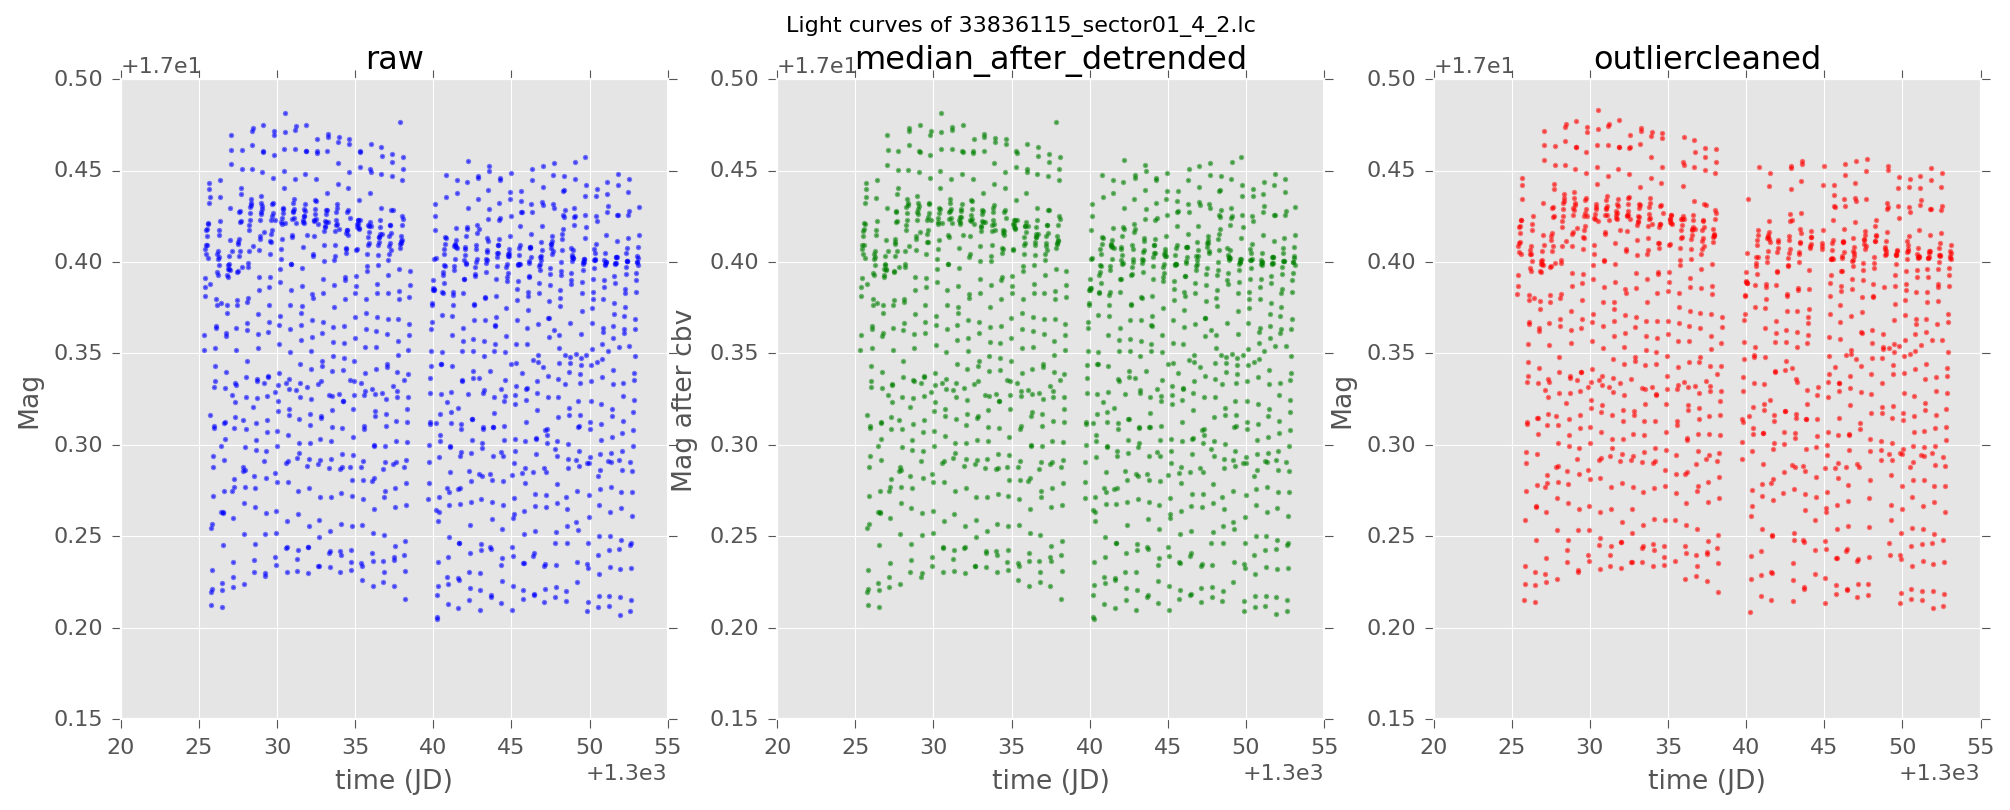

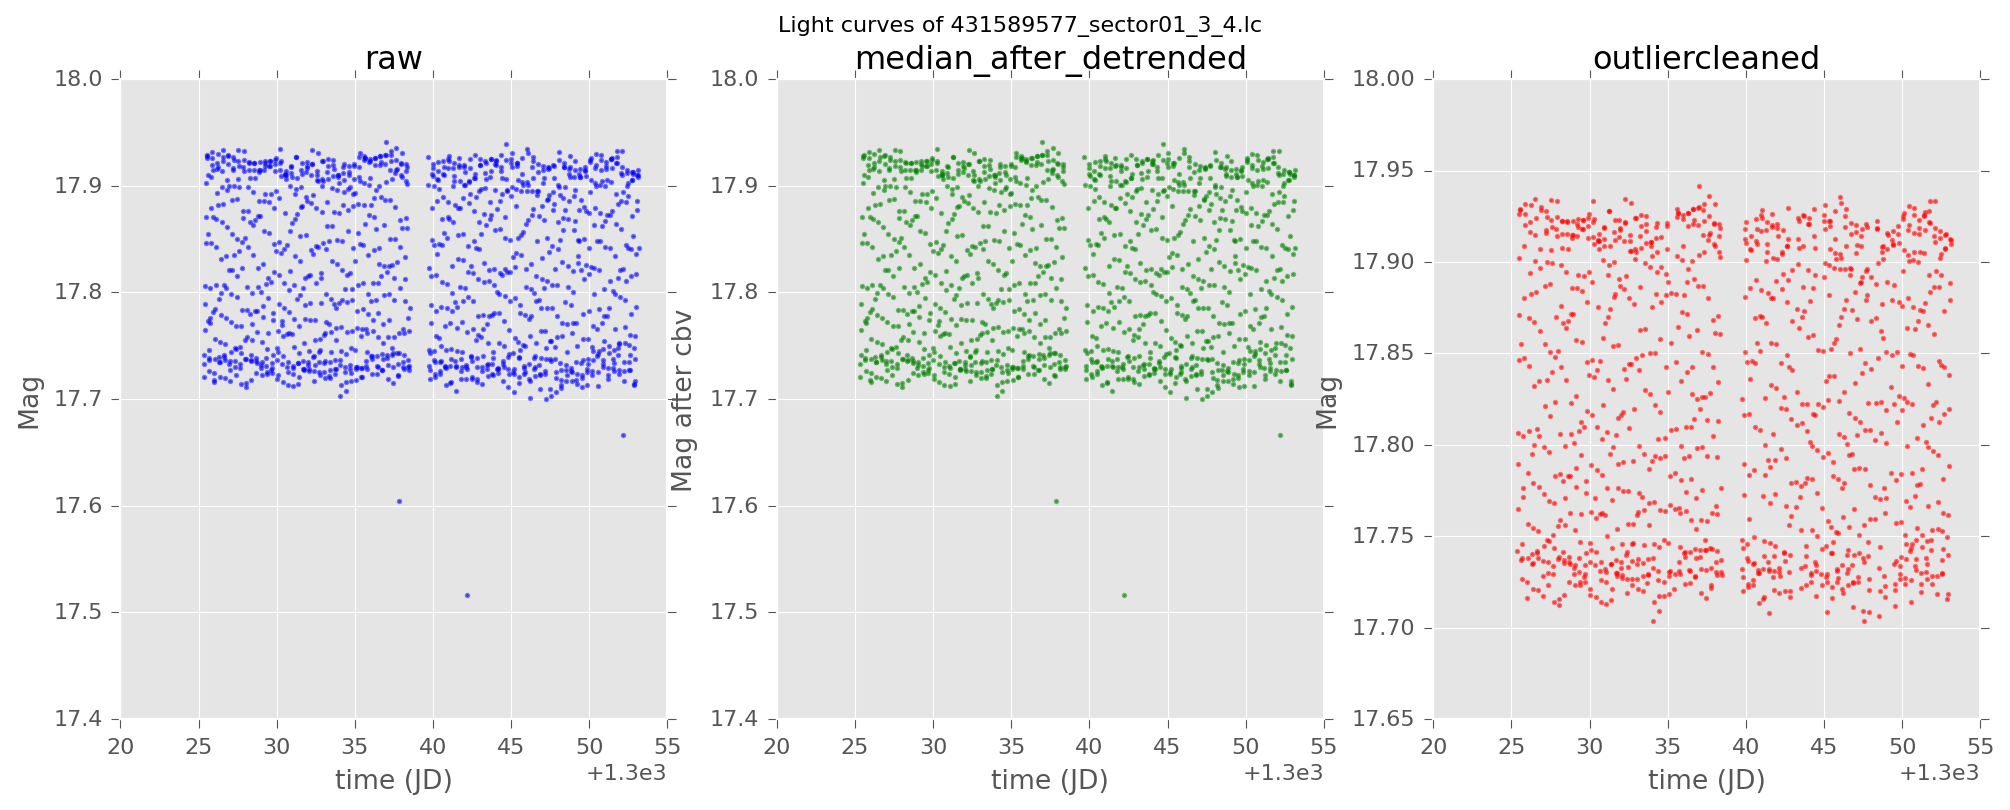

In [17]:
directory = input('Enter File name: ')
route1 = '_data\\_TESS_lightcurves_outliercleaned\\'
path1 = route1 + directory
print(path1)

route2 = '_data\\_TESS_lightcurves_raw\\'
path_raw = route2 + directory
print(path_raw)

route3 = '_data\\_TESS_lightcurves_median_after_detrended\\_lc_median_after_cbv_detrended_'
path_dt = route3 + directory
print(path_dt)

f_r = [path_raw + '\\' + file for file in os.listdir(path_raw)]
f_dt = [path_dt + '\\' + file for file in os.listdir(path_dt)]
f_oc = [path1 + '\\' + file for file in os.listdir(path1)]

for i in range(0,len(f_r)):
    data_r = pd.read_csv(f_r[i], sep='\s+', names=['time', 'mag', 'magerr'])
    data_dt = pd.read_csv(f_dt[i], sep='\s+', names=['time', 'mag', 'mag after cbv', 'magerr'])
    data_oc = pd.read_csv(f_oc[i], sep=',', names=['time', 'mag', 'magerr'])
    tess_r = data_r.to_records(index=False)
    tess_dt = data_dt.to_records(index=False)
    tess_oc = data_oc.to_records(index=False)
    # Light curve of raw,detrended and outliercleaned files
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.scatter(tess_r['time'], tess_r['mag'], alpha=0.5, linewidth=1.2, s=1.5, color = 'blue')
    plt.title('raw')
    plt.xlabel('time (JD)')
    plt.ylabel('Mag')
    plt.subplot(1, 3, 2)
    plt.scatter(tess_dt['time'], tess_dt['mag after cbv'], alpha=0.5, linewidth=1.2, s=1.5, color = 'green')
    plt.title('median_after_detrended')
    plt.xlabel('time (JD)')
    plt.ylabel('Mag after cbv')
    plt.subplot(1, 3, 3)
    plt.scatter(tess_oc['time'], tess_oc['mag'], alpha=0.5, linewidth=1.2, s=1.5, color = 'red')
    plt.title('outliercleaned')
    plt.xlabel('time (JD)')
    plt.ylabel('Mag')
    title = [i for i in os.listdir(path_raw)]
    plt.suptitle('Light curves of ' + title[i])
    plt.show()

## Summary <a class="anchor" id="fourth-bullet"></a>

At this point, you should have:
* seen how to open tables (i.e.: light curves) in Python
* plotted light curves in Python using `matplotlib`
* removed `NaN` values from light curves.